<a href="https://colab.research.google.com/github/Gibit1/Bike_buyers-Project.csv/blob/main/Akona_Ciko_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving insurance_claims_raw.xlsx to insurance_claims_raw (3).xlsx
(1000, 40)
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 99

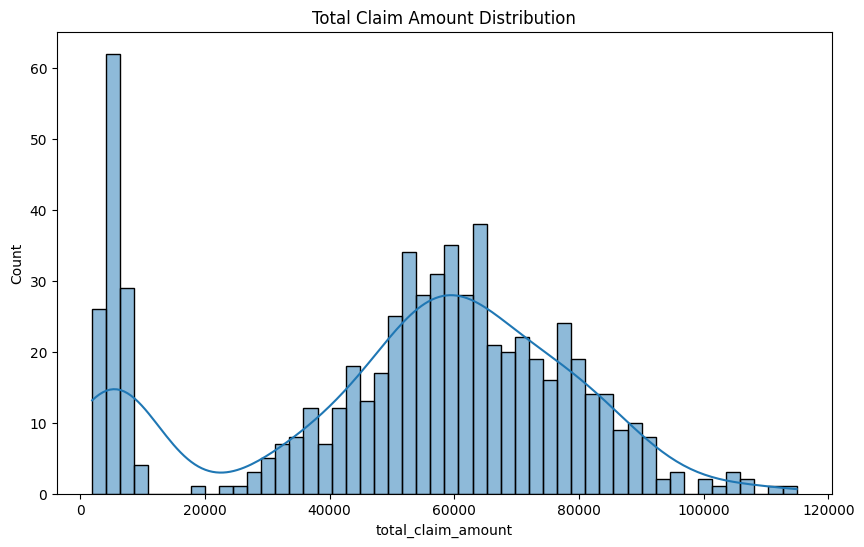

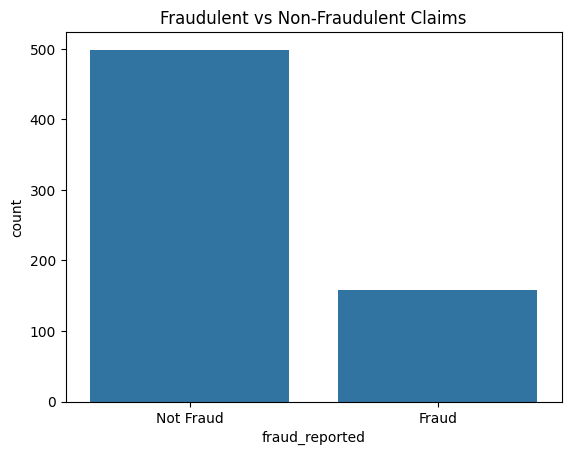

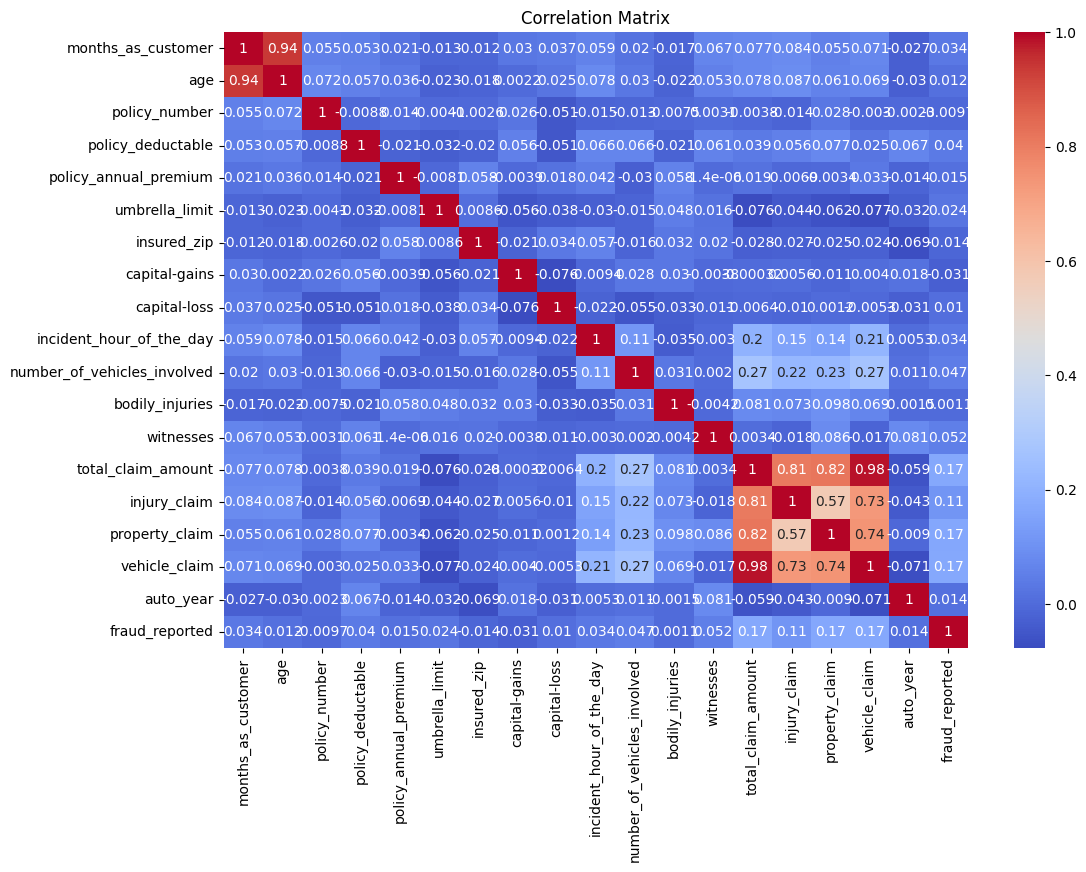

[[118   5]
 [ 41   1]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       123
           1       0.17      0.02      0.04        42

    accuracy                           0.72       165
   macro avg       0.45      0.49      0.44       165
weighted avg       0.60      0.72      0.63       165



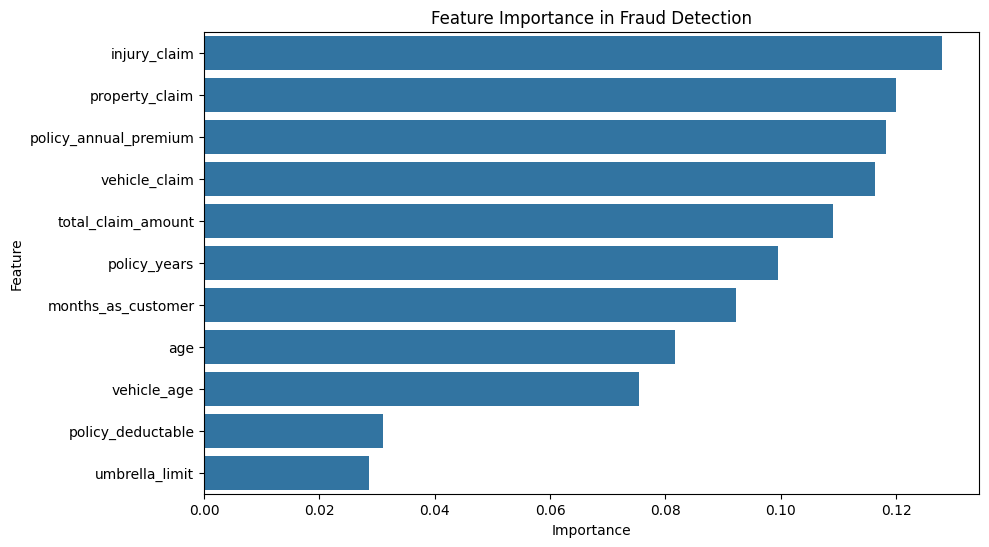

'\nKey Insights:\n- Most claims are not fraudulent.\n- High claim amounts and long policy durations are often linked with fraud.\n- The model achieves decent performance in identifying suspicious claims.\n\nNext Steps:\n- Tune model hyperparameters\n- Deploy model in a risk analysis workflow\n- Alert investigators on high-risk claims\n\nProject by: Akona Ciko\nDate: May 2025\n'

In [6]:
# Insurance Claims Fraud Detection - Google Colab Notebook

# 1. Project Introduction
"""
This project analyzes insurance claims to detect potential fraud.
We perform data cleaning, exploratory data analysis (EDA), and train a machine learning model to predict fraudulent claims.
"""

# 2. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 3. Upload and Load Data
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('insurance_claims_raw.xlsx')  # replace if uploaded file name differs

# 4. Initial Exploration
print(df.shape)
print(df.columns)
df.head()
df.info()
df.describe()
df.isnull().sum()

# 5. Data Cleaning
# Drop irrelevant columns
df.drop(columns=['_c39'], inplace=True, errors='ignore')

# Replace '?' with NaN and inspect missing data
df.replace('?', np.nan, inplace=True)
df.isnull().sum().sort_values(ascending=False)

# Fill or drop missing data (example strategies)
df.dropna(subset=['police_report_available'], inplace=True)
df.fillna({'collision_type': 'Unknown', 'property_damage': 'NO'}, inplace=True)

# Encode categorical fraud label
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

# 6. EDA
# Distribution of claim amount
plt.figure(figsize=(10,6))
sns.histplot(df['total_claim_amount'], bins=50, kde=True)
plt.title('Total Claim Amount Distribution')
plt.show()

# Fraud count
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraudulent vs Non-Fraudulent Claims')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 7. Feature Engineering (optional examples)
df['vehicle_age'] = 2025 - df['auto_year']
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['policy_years'] = 2025 - df['policy_bind_date'].dt.year

# Drop any rows with NaT dates if needed
df.dropna(subset=['policy_bind_date'], inplace=True)

# 8. Prepare Data for Modeling
# Select features and target
features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
            'umbrella_limit', 'total_claim_amount', 'injury_claim', 'property_claim',
            'vehicle_claim', 'vehicle_age', 'policy_years']
X = df[features]
y = df['fraud_reported']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
importances.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance in Fraud Detection')
plt.show()

# 9. Summary
"""
Key Insights:
- Most claims are not fraudulent.
- High claim amounts and long policy durations are often linked with fraud.
- The model achieves decent performance in identifying suspicious claims.

Next Steps:
- Tune model hyperparameters
- Deploy model in a risk analysis workflow
- Alert investigators on high-risk claims

Project by: Akona Ciko
Date: May 2025
"""

# New section